# <font color='#31394d'> Decision Trees Practice Exercise </font>

It's time for you to build your own decision tree! For this exercise we'll be using the wine dataset from UCI Machine Learning Repository (and luckily included with sklearn). This dataset will let us try to predict the quality of wine (1 of 3 different levels) based on it's chemical composition. In our professional opinion, this homework pairs well with whatever wine you have at home :)

We'll start by loading in the wine data set from sklearn and break it into X, y.

In [28]:
import seaborn as sns
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [10]:
import os
# add graphviz to path if not already there (for windows) 
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin/'

In [3]:
wine = datasets.load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [4]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [6]:
X = pd.DataFrame(wine['data'], columns = wine['feature_names'])
Y = pd.Series(wine['target'])

In [7]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [25]:
X.shape

(178, 13)

In [8]:
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [9]:
X.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [11]:
X.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

In [12]:
Y.head()

0    0
1    0
2    0
3    0
4    0
dtype: int32

In [15]:
Y.nunique()

3

🚀 <font color='#D9C4B1'>Exercise: </font> Build a decision tree classifer for the wine data, and get a cross-validated score of it's accuracy. Hint use the `cross_val_score` function from sklearn.model_selection

In [16]:
# build a decision tree classifier for the wine data, and get a cross-validated score of it's accuracy, use the cross_val_score function from sklearn.model_selection
# use the default parameters for the decision tree classifier, and use 5-fold cross validation
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
# get the accuracy score for the test set using the cross_val_score function but first let us get the predictions
tree.predict(X_test)
tree.score(X_test, y_test)

0.9444444444444444

In [34]:
# use cross_val_score to get the accuracy score for the test set
scores = cross_val_score(tree, X, Y, cv=5, scoring='accuracy')
print(scores)

[0.94444444 0.80555556 0.88888889 0.91428571 0.85714286]


🚀 <font color='#D9C4B1'>Exercise: </font> Fit your tree model on the full data and visualize your decision tree using graphviz. The `draw_tree` function from class is included - if you have extra time try playing around with the options and understand what the function is doing!

In [30]:
import graphviz
from sklearn.tree import export_graphviz

def draw_tree(tree):
    dot_data = export_graphviz(tree, out_file=None, 
                         feature_names=X.columns, 
                         class_names=['0', '1', '2'],
                         filled=True,
                         rounded=True,
                         proportion=True,  
                         special_characters=True)  
    
    graph = graphviz.Source(dot_data)
    graph.format = 'png'
    graph.render('tree',view=True)
    plt.figure(figsize=(50,30))
    img = mpimg.imread('tree.png')
    imgplot = plt.imshow(img)
    plt.show()

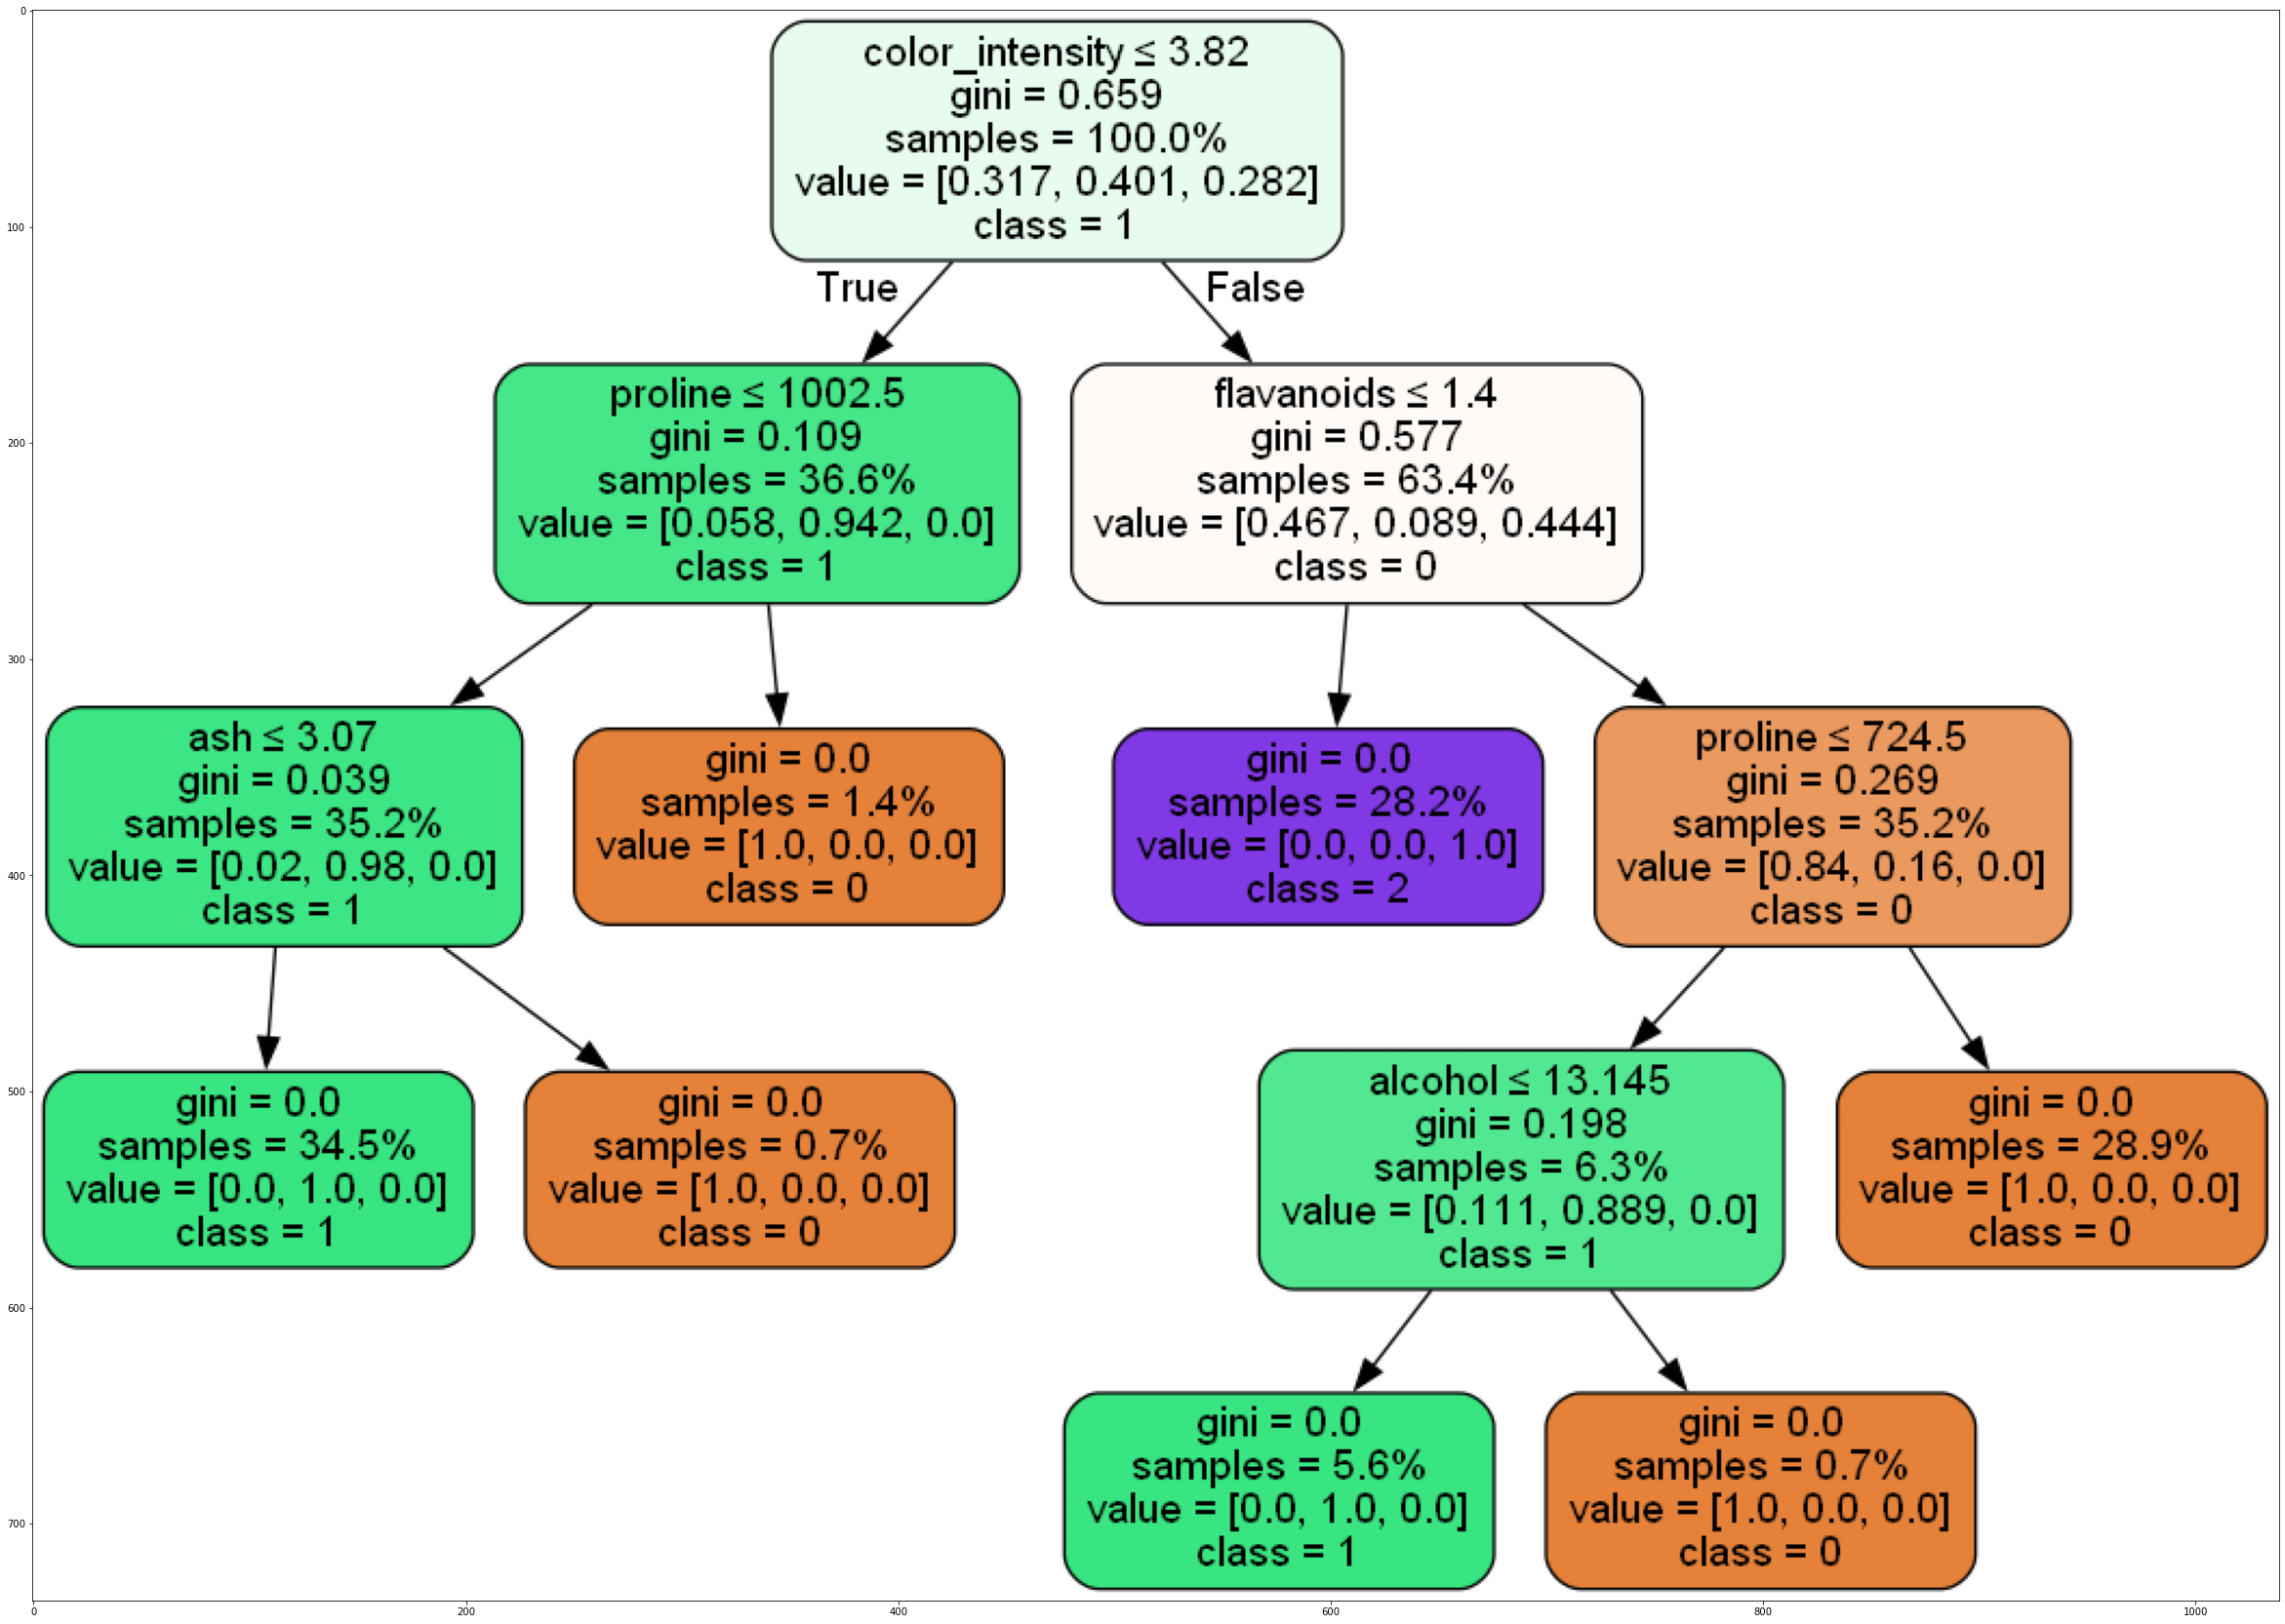

In [31]:
# visualize the tree using the draw_tree function
draw_tree(tree)

🚀 <font color='#D9C4B1'>Exercise: </font> Try varying the max_depth parameter - what's the best depth you can find (try options on the range of 2 to 10)? Hint don't test one by one, automate the hyper-parameter tuning!

In [32]:
DecisionTreeClassifier?

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    ccp_alpha=0.0,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the information gain.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until
    al

In [35]:
depths = np.arange(2, 10)
results = []

for depth in depths:
    best_depth_tree = DecisionTreeClassifier(max_depth=depth)
    results.append(cross_val_score(best_depth_tree, X,
                   Y, scoring="accuracy", cv=3).mean())


In [36]:
test = pd.DataFrame({"depths":depths, "mean_acc":results})
test.sort_values("mean_acc", ascending=False)

,depths,mean_acc
1,3,0.915537
2,4,0.904237
4,6,0.893126
6,8,0.893126
5,7,0.887571
3,5,0.870904
7,9,0.848682
0,2,0.786441


🚀 <font color='#D9C4B1'>Exercise: </font> What features are the most important in your model? Hint take a peak at the `feature_importances_` variable in decision tree objects and how we accessed it in the class notebook.

In [37]:
tree.feature_importances_

array([0.01899507, 0.        , 0.02094206, 0.        , 0.        ,
       0.        , 0.41105326, 0.        , 0.        , 0.38493424,
       0.        , 0.        , 0.16407537])

In [38]:
dict(zip(X, tree.feature_importances_))

{'alcohol': 0.01899506730206504,
 'malic_acid': 0.0,
 'ash': 0.020942061700526718,
 'alcalinity_of_ash': 0.0,
 'magnesium': 0.0,
 'total_phenols': 0.0,
 'flavanoids': 0.41105325641668755,
 'nonflavanoid_phenols': 0.0,
 'proanthocyanins': 0.0,
 'color_intensity': 0.3849342414127968,
 'hue': 0.0,
 'od280/od315_of_diluted_wines': 0.0,
 'proline': 0.16407537316792392}

The most important features in predicting the quality of wine are: flavanoids, color intensity